In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display
import sklearn.cross_validation as cv

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = pd.read_csv('~/projects/capstone/model_selection/pro3_Data.csv')
y = pd.read_csv('~/projects/capstone/model_selection/pro3_y.csv', header= None)
y = y[0]

In [3]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y)

In [4]:

from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(X_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(X_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [5]:
# grading boosting model 
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()
evaluate_model(gbt)

Train score: 0.170953927071
Test score: 0.173640338327
Total time: 5.94587182999



0.17364033832697201

In [6]:

def plot_gbt_learning(gbt):
    test_score = np.empty(len(gbt.estimators_))
    train_score = np.empty(len(gbt.estimators_))
    for i, pred in enumerate(gbt.staged_predict_proba(X_test)):
        test_score[i] = sklearn.metrics.log_loss(y_test, pred)
    for i, pred in enumerate(gbt.staged_predict_proba(X_train)):
        train_score[i] = sklearn.metrics.log_loss(y_train, pred)
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(gbt.n_estimators) + 1, test_score, label='Test') 
    plt.plot(np.arange(gbt.n_estimators) + 1, train_score, label='Train')

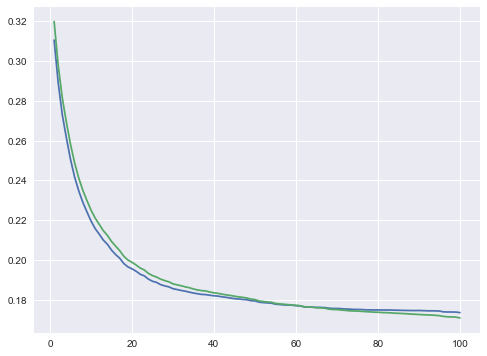

In [7]:
plot_gbt_learning(gbt)

In [8]:
#Definitely overfitting, lets add more estimators:
gbt = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2)

Train score: 0.130577609851
Test score: 0.177441592996
Total time: 27.3628389835



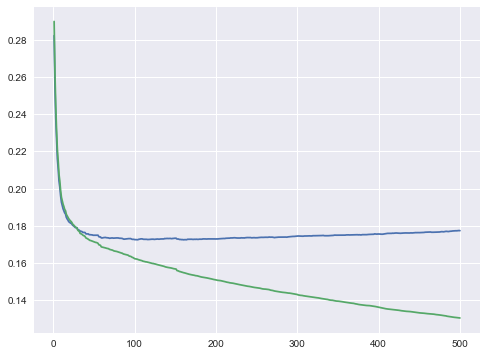

In [9]:
evaluate_model(gbt)
plot_gbt_learning(gbt)

In [11]:
#run a grid search to find best params:
from sklearn.grid_search import GridSearchCV

params = {'max_depth' : [3,4,5], 'n_estimators':[60,80, 100],'learning_rate': [0.1,0.15], 
          'subsample': [0.5,1.0]}
grid = GridSearchCV(GradientBoostingClassifier(), params, scoring='log_loss')
evaluate_model(grid)
grid.grid_scores_

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake

Train score: 0.158044122424
Test score: 0.172354923703
Total time: 571.723799944



[mean: -0.18639, std: 0.00628, params: {'n_estimators': 60, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.18411, std: 0.00560, params: {'n_estimators': 60, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.18494, std: 0.00616, params: {'n_estimators': 80, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.18258, std: 0.00551, params: {'n_estimators': 80, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.18379, std: 0.00508, params: {'n_estimators': 100, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.18137, std: 0.00543, params: {'n_estimators': 100, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 3},
 mean: -0.18415, std: 0.00626, params: {'n_estimators': 60, 'subsample': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.18092, std: 0.00576, params: {'n_estimators': 60, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 4},
 mean: -0.18328, std: 0.00532, params: {'n_estimators': 80, 's

In [14]:
best_grid = grid.best_estimator_

In [ ]:
params = {'max_depth' : 4, 'n_estimators': 60,'learning_rate': 0.1}
gbt = GradientBoostingClassifier(**params)
sample_weight = map(lambda x: 1 if x == 0 else 7, y_train)
#gbt.fit(x_train,y_train)
gbt.fit(x_train,y_train, sample_weight = sample_weight)
gbt.score(x_train,y_train)

In [15]:
best_grid.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=80, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [18]:
best_grid.score(X_train, y_train)

0.92952639927486969

## Classification Reports:

In [22]:
from sklearn.metrics import classification_report

gbt_pred_train = best_grid.predict(X_train)
target_names = ['class No','class Yes']
print (classification_report(y_train,gbt_pred_train, target_names = target_names))

             precision    recall  f1-score   support

   class No       0.95      0.97      0.96     27369
  class Yes       0.73      0.60      0.66      3522

avg / total       0.93      0.93      0.93     30891



In [23]:

gbt_pred_Test = best_grid.predict(X_test)
target_names = ['class No','class Yes']
print (classification_report(y_test,gbt_pred_Test, target_names = target_names))

             precision    recall  f1-score   support

   class No       0.95      0.96      0.95      9179
  class Yes       0.65      0.55      0.60      1118

avg / total       0.91      0.92      0.92     10297



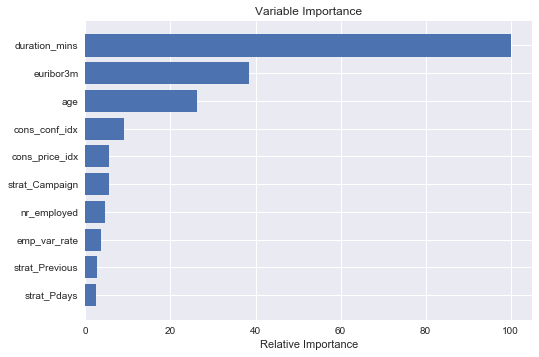

In [27]:

feature_importance = gbt.feature_importances_
#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
show_features = feature_importance[:10] #top twenty
sorted_idx =np.argsort(show_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, show_features[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

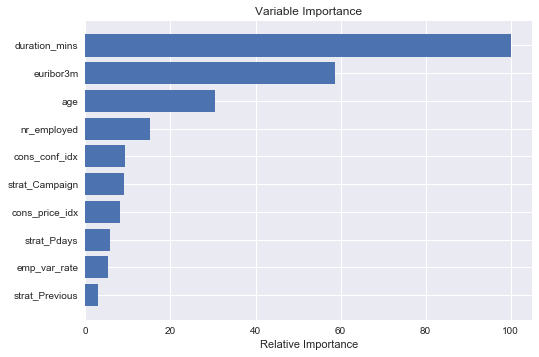

In [28]:

feature_importance = best_grid.feature_importances_
#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
show_features = feature_importance[:10] #top twenty
sorted_idx =np.argsort(show_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, show_features[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()